## Preparation of data set
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html

OpenML, “mauna-loa-atmospheric-co2,” Data set, OpenML, Data ID 41187. Available: https://www.openml.org/d/41187

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

co2 = fetch_openml(data_id=41187, as_frame=True)
co2.frame.head()
co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")
co2_data.head()
try:
    co2_data_resampled_monthly = co2_data.resample("ME")
except ValueError:
    # pandas < 2.2 uses M instead of ME
    co2_data_resampled_monthly = co2_data.resample("M")
co2_data = co2_data_resampled_monthly.mean().dropna(axis="index", how="any")
x = (co2_data.index.year + co2_data.index.month / 12).to_numpy()
y = co2_data["co2"].to_numpy()

df = pd.DataFrame({"year": x, "co2": y})
df.to_csv("co2_data.csv", index=False)

(521, 1) (521, 1)


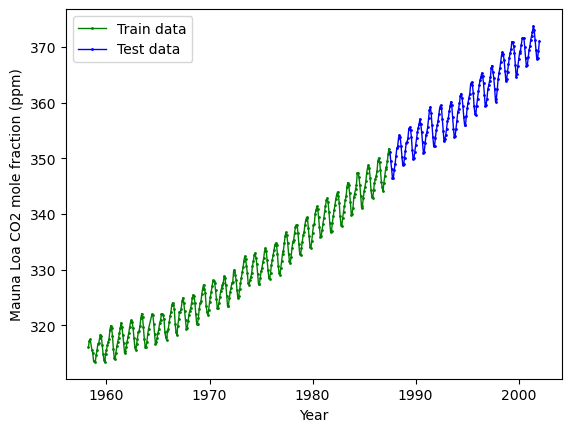

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("co2_data.csv")
x = df["year"].to_numpy()[:,np.newaxis]
y = df["co2"].to_numpy()[:,np.newaxis]

data_all = [x,y]
print(x.shape, y.shape)
nsplit = data_all[0].shape[0]//3*2
data_train = [x[:nsplit],y[:nsplit]]
data_test = [x[nsplit:],y[nsplit:]]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(data_train[0], data_train[1], 'g.-', label='Train data', linewidth = 1, markersize=2)
ax.plot(data_test[0], data_test[1], 'b.-', label='Test data', linewidth = 1, markersize=2)
ax.set_xlabel("Year")
ax.set_ylabel("Mauna Loa CO2 mole fraction (ppm)")
ax.legend()
plt.show()